### **Импорт библиотек**


In [3]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

### **Загрузка данных на Google Drive**

In [4]:
#загружаем уже очищенный набор данных
uploaded = files.upload()

Saving cars_moldova_good2.csv to cars_moldova_good2.csv


**посмотрим на датафрейм**

In [5]:
df = pd.read_csv('/content/cars_moldova_good2.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
32529,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
32530,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
32531,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
32532,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


## ***Задание*** ***1***

*Выполните визуализацию данных с использованием библиотеки Pandas.*

**посмотрим, какие есть численные и категориальные столбцы:**

In [6]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


**для начала посмотрим, как выглядят значения числовых признаков на гистограмме**

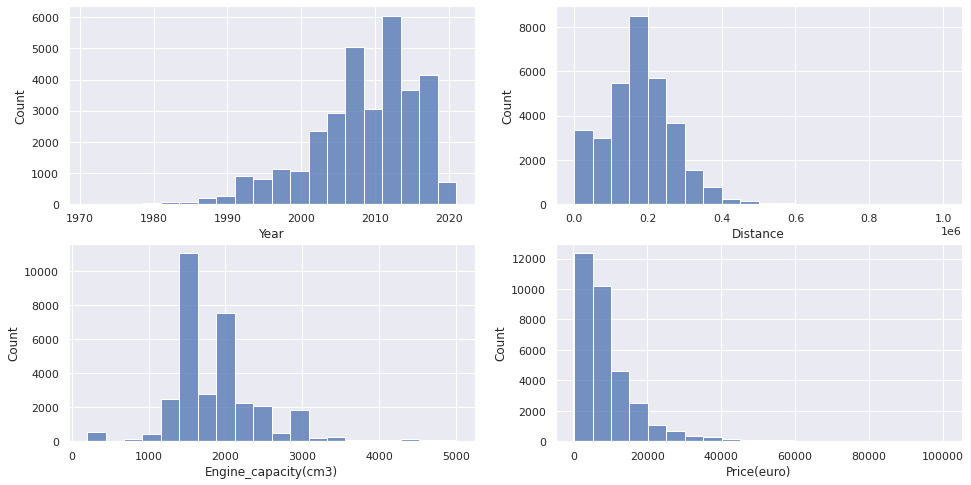

In [7]:

width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height, width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

<Figure size 1080x1080 with 0 Axes>

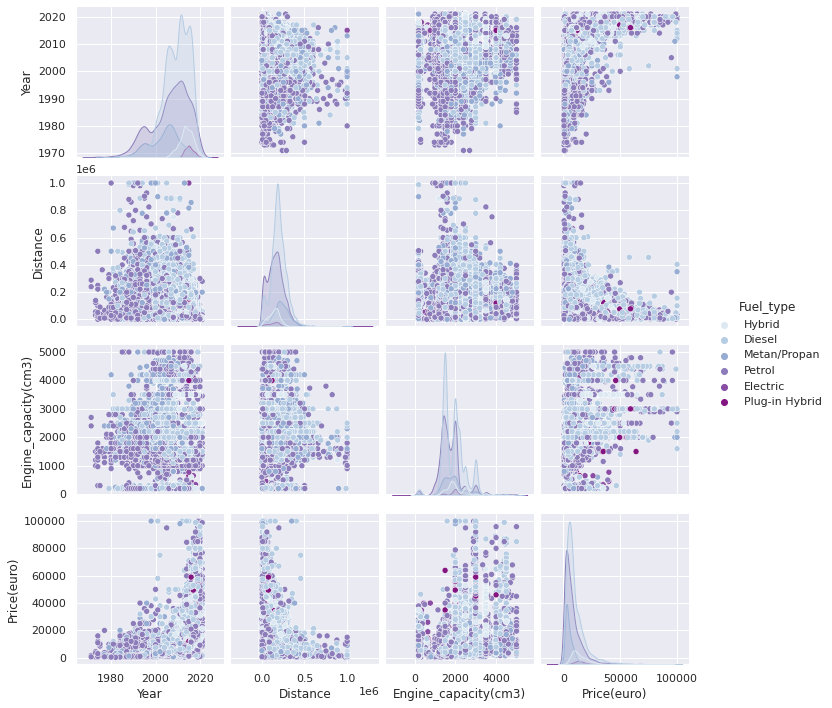

In [8]:
#сделаем точечную диаграмму с распределением по типу топлива
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, 
             hue ='Fuel_type',
             palette = 'BuPu',);

### **Построим скатеорграмму**

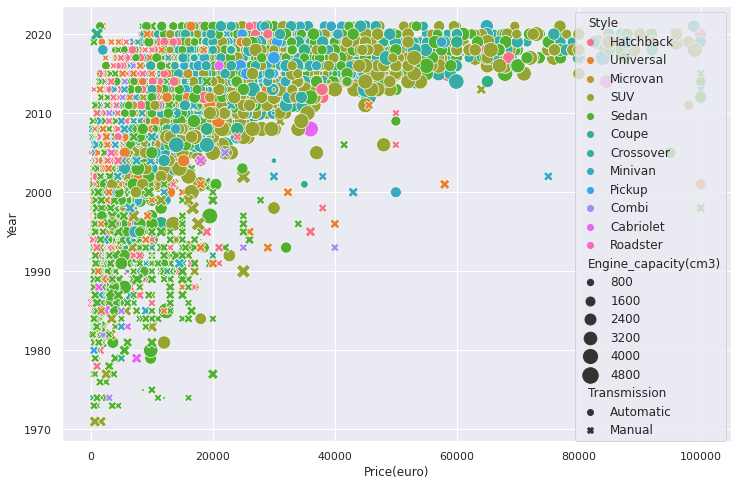

In [9]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=df['Price(euro)'], 
                y=df['Year'],
                size=df['Engine_capacity(cm3)'],
                sizes=(10, 250),
                hue=df['Style'],
                style=df['Transmission']
                )

***получен двумерный график со множеством параметров.*** 
- видна корреляция стоимости автомобиля, стоимости, типа трансмиссии, стиля автомобиля и года выпуска

### **Построим линейную регрессию**

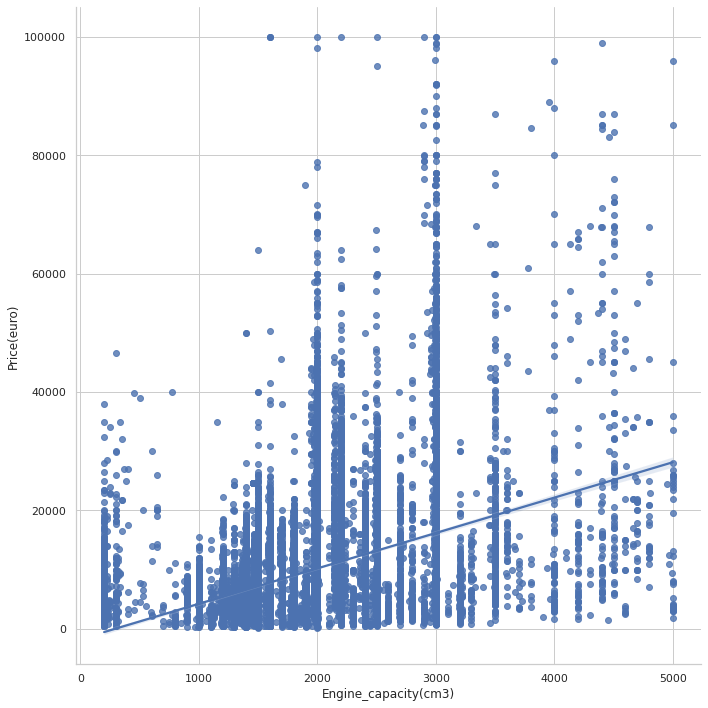

In [10]:
#зависимость стоимости от объема двигателя
## данные для регрессии не подходят
sns.set_style('whitegrid')
fig = sns.lmplot(y='Price(euro)', x='Engine_capacity(cm3)', data=df, height = 10)

## **Задание 2**

**Добавление новых признаков на основе имеющихся**

***новый признак - удельный пробег за год***

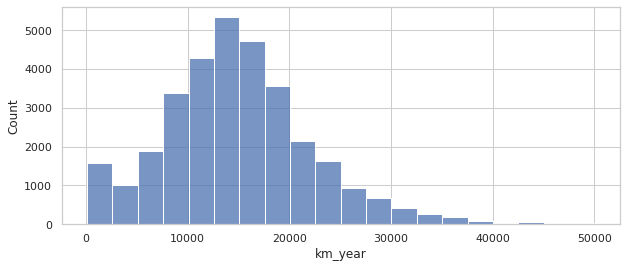

In [11]:

df['Age'] = 2022 - df.Year
df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

# его визуализация
plt.figure(figsize=(10,4))
sns.histplot(data=df,
             x='km_year',
             bins=20
             )

In [12]:
# введем квантильные категории. распределение по большому, среднему и маленькому пробегу
df['km_category'] = 0
df['km_category'] = np.where(df['km_year'] <= 13000, 'Small', df['km_category'])
df['km_category'] = np.where((df['km_year'] > 13000) & (df['km_year'] < 20000), 'Middle', df['km_category'])
df['km_category'] = np.where(df['km_year'] >= 20000, 'Big', df['km_category'])

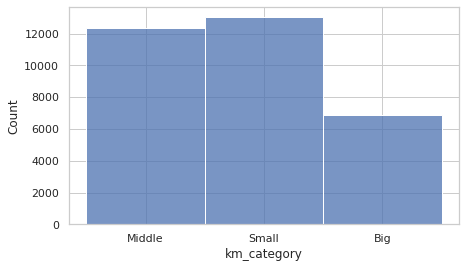

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(data=df,
             x='km_category',
             bins=5
             )
#нормальное распределение

***Введем категории "Редкий дешевый" и "Редкий дорогой"*** 

для этого сначала определим "дешевый (встречается менее 25 раз)

In [14]:
count = df.Make.value_counts()
rare = count[(count.values < 25)]
df['Make'] = df['Make'].replace(rare.index.values, 'rare')

In [15]:
df['Make'] = np.where((df['Price(euro)'] < 7000) & (df['Make'] == 'rare'), 'Rare cheap', df['Make'])

df['Make'] = np.where((df['Price(euro)'] >= 7000) & (df['Make'] == 'rare'), 'Rare expensive', df['Make'])

df.Make.value_counts()

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Seat               239
Porsche            190
Rare cheap         184
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Rare expensive      68
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / 

***Проведем корреляцию признаков***

In [16]:
cm = sns.color_palette("vlag", as_cmap=True)

df.corr().style.background_gradient(cmap=cm, vmin = -1, vmax=1)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year
Year,1.000000,-0.434240,-0.025886,0.551517,-1.000000,0.425819
Distance,-0.434240,1.000000,0.067473,-0.347328,0.434240,0.462784
Engine_capacity(cm3),-0.025886,0.067473,1.000000,0.382841,0.025886,-0.010412
Price(euro),0.551517,-0.347328,0.382841,1.000000,-0.551517,0.156816
Age,-1.000000,0.434240,0.025886,-0.551517,1.000000,-0.425819
km_year,0.425819,0.462784,-0.010412,0.156816,-0.425819,1.000000


## **Задание 3**
***Предварительная обработка данных***

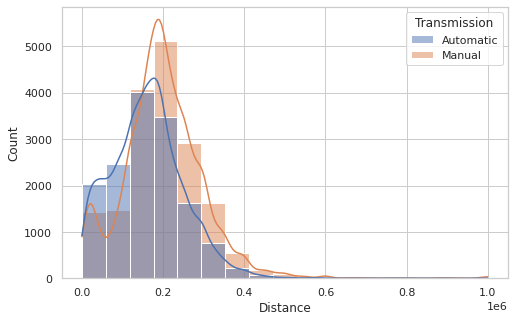

In [17]:
# данные перед стандартизацией
fig = plt.figure(figsize=(8,5))
sns.histplot(data = df,
             x='Distance',
             hue = 'Transmission',
             bins = 17,
             kde = True)

***Стандартизация***

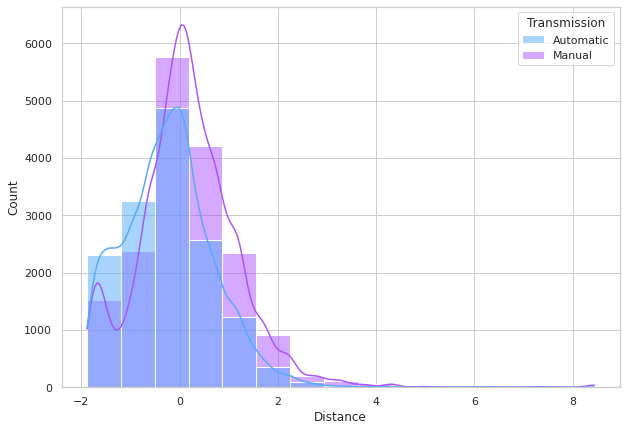

In [27]:
# проводим стандартизацию и смотрим, что получилось
df_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
df_scaled[num_columns] = (df[num_columns]-M)/STD

fig = plt.figure(figsize=(10,7))
sns.histplot(data = df_scaled,
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='cool')

распределение то же. изменился масштаб.
 - сохраним файл


In [28]:
df_scaled.to_csv("/content/cars_moldova_standartization.csv",index=False)

***Нормализация***

In [33]:
df_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

df_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

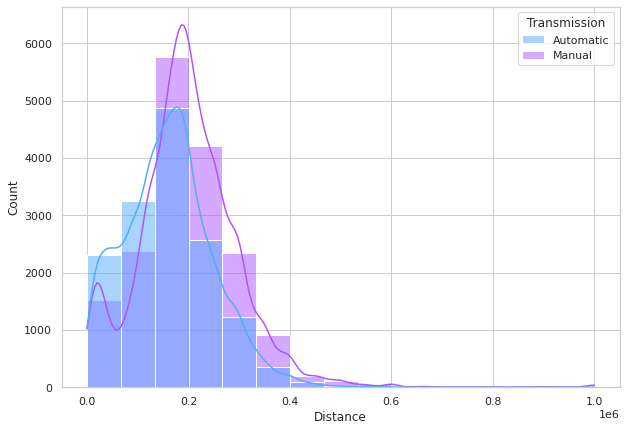

In [30]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = df,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='cool')

In [34]:
# сохраним 
df_norm.to_csv("/content/cars_moldova_normalization.csv",index=False)

***логарифмирование и стандартизация***

In [35]:
df_power = df.copy()
df_power[num_columns] = np.log(df_power[num_columns])
M = df_power[num_columns].mean()
STD = df_power[num_columns].std()
df_power[num_columns] = (df_power[num_columns]-M)/STD

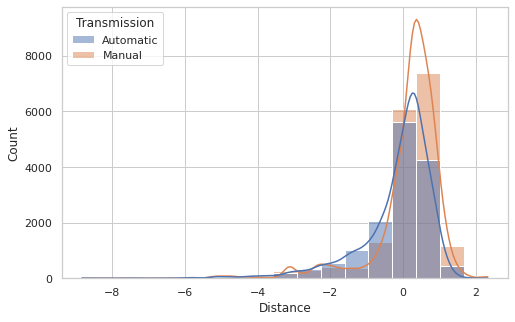

In [36]:
fig = plt.figure(figsize=(8,5))
sns.histplot(data = df_power,
             x='Distance',
             hue = 'Transmission',
             bins = 17,
             kde = True)

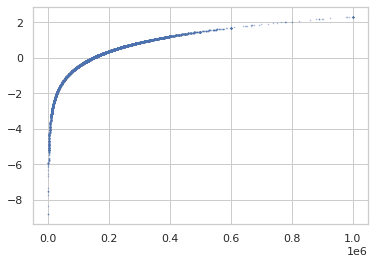

In [37]:
plt.plot(df['Distance'], df_power['Distance'], '.', alpha = 0.5, markersize = 1)

In [38]:
# сохраним
df_power.to_csv("/content/cars_log.csv",index=False)

***One-hot encoding***

для категориальных признаков. делаем матрицу со значениями 0 или 1

In [39]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)

df_ohe.head(5)

,Year,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,...,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,km_category_Big,km_category_Middle,km_category_Small
0,2011,195000.0,1800.0,7750.0,11,17727.272727,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,2014,135000.0,1500.0,8550.0,8,16875.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2012,110000.0,1500.0,6550.0,10,11000.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,200000.0,1600.0,4100.0,16,12500.000000,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,2000,300000.0,2200.0,3490.0,22,13636.363636,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [40]:
# сохраним
df_ohe.to_csv("/content/cars_onehotencoding.csv",index=False)